<h1 style='text-align: center'><strong>Logistic Regression</strong></h1>
<h3 style='text-align: center'>Machine Learning</h3>
<h5 style='text-align: center'><a href='https://github.com/AlvaroVasquezAI'>Álvaro Vásquez AI</a></h5>

<div style='text-align: center'>
    <a href='https://github.com/AlvaroVasquezAI'><img src='https://img.icons8.com/color/48/000000/github--v1.png'/></a>
    <a href='https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/'><img src='https://img.icons8.com/color/48/000000/linkedin.png'/></a>
    <a href='https://www.instagram.com/alvarovasquez.ai'><img src='https://img.icons8.com/color/48/000000/instagram-new--v1.png'/></a>
    <a href='https://twitter.com/alvarovasquezai'><img src='https://img.icons8.com/color/48/000000/twitter--v1.png'/></a>
    <a href='https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA'><img src='https://img.icons8.com/color/48/000000/youtube-play.png'/></a>
    <a href='mailto: agarciav2102@alumno.ipn.mx'><img src='https://img.icons8.com/color/48/000000/email.png'/></a>
</div>

<h2 style='text-align: center'><strong>Titanic Survival Prediction</strong></h2>

<h4 style='text-align: center'>Using Logistic Regression</h4>

<div>
    <h3><strong>Table of contents</strong></h3>
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Libraries">Libraries</a></li>
        <li><a href="#Dataset">Dataset</a></li>
        <li><a href="#Features">Features</a></li>
        <li><a href="#Splitting-the-dataset">Splitting the dataset</a></li>
        <li><a href="#Logistic-Regression-Model">Logistic Regression Model</a></li>
        <li><a href="#Predictions">Predictions</a></li>
        <li><a href="#Evaluation">Evaluation</a></li>
        <li><a href="#EasyExampleWithVideo">Easy Example With Video</a></li>
    </ol>
</div>

<h2 style='text-align: center' id='Introduction'><strong>1. Introduction</strong></h2>

Logistic regression is a statistical method for predicting binary outcomes from data. It is a type of regression analysis used for predicting the outcome of a categorical dependent variable based on one or more predictor variables. The logistic regression model can be expressed as:

$$ P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}} $$

Where:
- $ P(Y=1|X) $ is the probability that the dependent variable equals 1 given the values of the independent variables.
- $ e $ is the base of the natural logarithm.
- $ \beta_0 $ is the intercept.
- $ \beta_1, \beta_2, ..., \beta_n $ are the coefficients of the independent variables.
- $ X_1, X_2, ..., X_n $ are the independent variables.

# <h2 style='text-align: center' id='Libraries'><strong>2. Libraries</strong></h2>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

- **pandas**: For data manipulation and analysis.
- **train_test_split from sklearn.model_selection**: To split the dataset into training and testing sets.
- **LogisticRegression from sklearn.linear_model**: To create and train the logistic regression model.
- **classification_report from sklearn.metrics**: To evaluate the model's performance.
- **ConfusionMatrixDisplay from sklearn.metrics**: To display the confusion matrix.
- **matplotlib.pyplot**: For plotting the results.

<h2 style='text-align: center' id='Dataset'><strong>3. Dataset</strong></h2>

The dataset we will use is the Titanic dataset. It contains information about the passengers of the Titanic and their survival status.

In [2]:
# Load the Titanic dataset
data_url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(data_url)
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


- **data_url**: URL to download the dataset.
- **pd.read_csv(data_url)**: Reads the dataset into a DataFrame `df`.

<h2 style='text-align: center' id='Features'><strong>4. Features</strong></h2>

In [3]:
# Preprocess the data
df = df.dropna(subset=['Age', 'Fare', 'Sex'])
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# Select the features and target variable
X = df[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = df['Survived']

In [4]:
X

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
882,2,1,27.0,0,0,13.0000
883,1,0,19.0,0,0,30.0000
884,3,0,7.0,1,2,23.4500
885,1,1,26.0,0,0,30.0000


In [5]:
y

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

- **df.dropna**: Removes rows with missing values in the specified columns.
- **df['Sex'].apply(lambda x: 1 if x == 'male' else 0)**: Converts the 'Sex' column to binary labels.
- **X = df[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']].values**: Selects the features.
- **y = df['Survived'].values**: Selects the target variable.

<h2 style='text-align: center' id='Splitting-the-dataset'><strong>5. Splitting the dataset</strong></h2>

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **train_test_split(X, y, test_size=0.2, random_state=42)**: Splits the data into training and testing sets. 80% of the data is used for training (`X_train` and `y_train`), and 20% is used for testing (`X_test` and `y_test`).
- **test_size=0.2**: Specifies that 20% of the data should be used for testing.
- **random_state=42**: Ensures reproducibility by setting a random seed.

<h2 style='text-align: center' id='Logistic-Regression-Model'><strong>6. Logistic Regression Model</strong></h2>

In [7]:
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

- **model = LogisticRegression(max_iter=1000)**: Initializes the logistic regression model.
- **model.fit(X_train, y_train)**: Trains the model using the training data (`X_train` and `y_train`).

<h2 style='text-align: center' id='Classification'><strong>7. Classification</strong></h2>

In [8]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0], dtype=int64)

- **y_pred = model.predict(X_test)**: Uses the trained model to make predictions on the testing data (`X_test`).

<h2 style='text-align: center' id='Evaluation'><strong>8. Evaluation</strong></h2>

              precision    recall  f1-score   support

           0       0.76      0.87      0.82       111
           1       0.73      0.55      0.63        67

    accuracy                           0.75       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.75      0.75      0.74       178



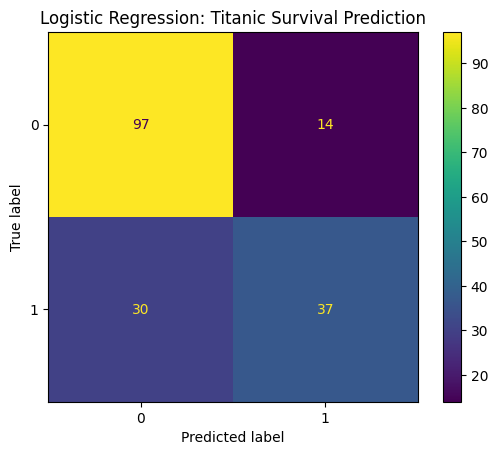

Accuracy: 0.75


In [9]:
from sklearn.metrics import accuracy_score

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Logistic Regression: Titanic Survival Prediction')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

- **print(classification_report(y_test, y_pred))**: Generates a classification report showing precision, recall, and F1-score for each class.
- **ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)**: Plots the confusion matrix for the predictions.
- **accuracy_score(y_test, y_pred)**: Calculates the accuracy of the model on the testing data.
- **print(f'Accuracy: {accuracy:.2f}')**: Prints the accuracy of the model.

<h2 style='text-align: center' id='EasyExampleWithVideo'><strong>9. Easy Example With Video</strong></h2>


<div style='text-align: center'>
    <a href='https://www.instagram.com/p/C9Ft7Wrx4zH/'><img src='Videos/RandomForest.png' width='250'/></a>
    <p>Click on the image to watch the video</p>
</div>

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a simple dataset
data = {
    'Exam1': [34, 67, 56, 89, 45, 78, 90, 56, 72, 88],
    'Exam2': [45, 70, 65, 94, 55, 80, 91, 60, 75, 92],
    'Admitted': [0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

In [11]:
# Select the features and target variable
X = df[['Exam1', 'Exam2']]
y = df['Admitted']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Make predictions
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



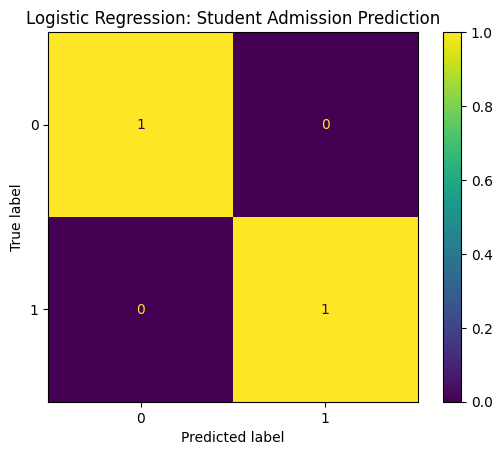

Accuracy: 1.00


In [15]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Logistic Regression: Student Admission Prediction')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')